In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
import src.soporte_logistica_preprocesamiento as pre


pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [2]:
df = pd.read_pickle("../../datos/05_datos_outliers_gestionado.plk")

# Desbalanceo
- Ocurre cuando tenemos en la variable respuesta demasiados valores de una opción y muy pocos de la otra
- En nuestro caso esto ocurre, vamos a mostrarlo
- Recordemos que:
    - 0 es No 
    - 1 es Si

In [3]:
df["Attrition"].value_counts()

Attrition
0    3611
1     711
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Attrition'>

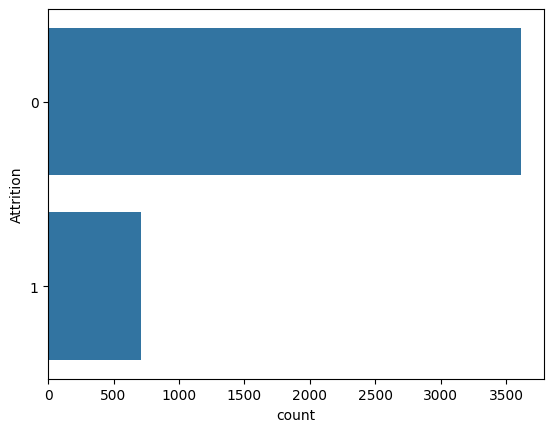

In [4]:
sns.countplot(df["Attrition"].astype("category"))

Como vemos, tenemos muchos valores 0 y pocos 1

In [5]:
desbalanceo = pre.Desbalanceo(df,"Attrition")

# Utilizar SMOTENC

In [6]:
df.sample()

,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,NumCompaniesWorked,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Age,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,Gender_Female,Gender_Male,JobLevel_Level 1,JobLevel_Level 2,JobLevel_Level 3,JobLevel_Level 4,JobLevel_Level 5,PercentSalaryHike_11 %,PercentSalaryHike_12 %,PercentSalaryHike_13 %,PercentSalaryHike_14 %,PercentSalaryHike_15 %,PercentSalaryHike_16 %,PercentSalaryHike_17 %,PercentSalaryHike_18 %,PercentSalaryHike_19 %,PercentSalaryHike_20 %,PercentSalaryHike_21 %,PercentSalaryHike_22 %,PercentSalaryHike_23 %,PercentSalaryHike_24 %,PercentSalaryHike_25 %,StockOptionLevel_Level 0,StockOptionLevel_Level 1,StockOptionLevel_Level 2,StockOptionLevel_Level 3
604,0.00,-1.00,-0.32,0.00,0.18,-0.18,-1.12,0.10,-0.20,-0.98,1.00,0.00,46,0,141180,12,6,1,4,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [7]:
cols_cat = ["BusinessTravel", "Department", "DistanceFromHome",
             "EducationField", "JobRole", "MaritalStatus",
             "NumCompaniesWorked","TrainingTimesLastYear",
             "EnvironmentSatisfaction","JobSatisfaction",
             "WorkLifeBalance","JobInvolvement"]

In [8]:
df_balanced = desbalanceo.balancear_clases_smotenc(cols_cat)

In [9]:
df.to_pickle("../../datos/06_datos_balanceados.pkl")